# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **12th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

4

: 

['Tanzania', 'Myanmar']

,
 

5

: 

[

'Tunisia'

, 

'Trinidad and Tobago'

, 

'Grenada'

, 

'Libya'

, 

'Jordan'

, 

'Fiji'

,
     

'Antigua and Barbuda'

, 

'Papua New Guinea'

, 

'Belize'

, 

'Hungary'

, 

'Brunei'

,
     

'Georgia'

, 

'Dominica'

]

,
 

6

: 

[

'Mauritius'

, 

'Yemen'

, 

'Ireland'

, 

'Cambodia'

, 

'Seychelles'

, 

'Uganda'

,
     

'Jamaica'

, 

'Comoros'

, 

'Andorra'

, 

'Equatorial Guinea'

, 

'Guinea-Bissau'

,
     

'Lesotho'

, 

'Slovakia'

, 

'Czech Republic'

, 

'Slovenia'

, 

'Cyprus'

]

,
 

7

: 

[

'Paraguay'

, 

'Vietnam'

, 

'Central African Republic'

, 

'Mongolia'

,
     

'Mozambique'

, 

'South Sudan'

, 

'Lebanon'

, 

'Burundi'

, 

'Kyrgyzstan'

,
     

'Australia'

, 

'Colombia'

, 

'Guyana'

, 

'Sao Tome and Principe'

, 

'Spain'

,
     

'Afghanistan'

, 

'San Marino'

, 

'Monaco'

, 

'Angola'

, 

'Montenegro'

,
     

'Kazakhstan'

, 

'Namibia'

, 

'Netherlands'

, 

'New Zealand'

, 

'Gambia'

, 

'Malawi'

,
     

'Saint Vincent and the Grenadines'

, 

'Bahamas'

]

,
 

8

: 

[

'Thailand'

, 

'Argentina'

, 

'Djibouti'

, 

'Nepal'

, 

'Ukraine'

, 

'Saint Lucia'

,
     

'Morocco'

, 

'Liechtenstein'

, 

'Niger'

, 

'Barbados'

, 

'Ecuador'

, 

'Eritrea'

,
     

'Costa Rica'

, 

'Norway'

, 

'Suriname'

, 

'Zambia'

, 

'Lithuania'

, 

'Madagascar'

,
     

'Austria'

, 

'Ethiopia'

, 

'Rwanda'

, 

'Nicaragua'

, 

'Malta'

, 

'Denmark'

,
     

'Croatia'

, 

'Israel'

, 

'Zimbabwe'

, 

'Palestine'

, 

'Iceland'

, 

'Sudan'

, 

'Kenya'

,
     

'Botswana'

]

,
 

9

: 

[

'China'

, 

'Greece'

, 

'Mauritania'

, 

'Haiti'

, 

'Taiwan'

, 

'Korea, South'

,
     

'Japan'

, 

'Romania'

, 

'Gabon'

, 

'Syria'

, 

'Bhutan'

, 

'Poland'

, 

'Chad'

,
     

'Burkina Faso'

, 

'Ghana'

, 

'India'

, 

'Cameroon'

, 

'Kosovo'

, 

'Serbia'

, 

'Qatar'

,
     

'Bermuda'

, 

'Tajikistan'

, 

'Somalia'

, 

'Maldives'

, 

'Liberia'

, 

'Philippines'

,
     

'Sri Lanka'

, 

'Benin'

, 

'Uruguay'

, 

'South Africa'

, 

'Finland'

]

,
 

10

: 

[

'Swaziland'

, 

'Saudi Arabia'

, 

'Singapore'

, 

'Cape Verde'

, 

'Belarus'

, 

'Mali'

,
      

'El Salvador'

, 

'Germany'

, 

'Estonia'

, 

'Canada'

, 

'Venezuela'

,
      

'Sierra Leone'

, 

'Chile'

, 

'Portugal'

, 

'Bulgaria'

, 

'Pakistan'

, 

'Oman'

,
      

'Luxembourg'

, 

'Cuba'

, 

'Senegal'

, 

'Congo'

, 

'Guatemala'

, 

'Indonesia'

,
      

'Malaysia'

, 

'Albania'

, 

'Uzbekistan'

, 

'Azerbaijan'

]

,
 

11

: 

[

'Belgium'

, 

'Bosnia and Herzegovina'

, 

'Nigeria'

, 

'Panama'

, 

'Armenia'

,
      

'Switzerland'

, 

'Mexico'

, 

'Peru'

, 

'Macedonia'

, 

'Algeria'

, 

'Honduras'

,
      

'Guinea'

, 

'France'

, 

'Dominican Republic'

, 

'Bangladesh'

, 

'Egypt'

, 

'Togo'

,
      

'Iraq'

, 

'Moldova'

]

,
 

12

: 

[

'Bolivia'

, 

'United States'

, 

'United Arab Emirates'

, 

'Turkey'

, 

'Italy'

,
      

'Brazil'

, 

'Iran'

, 

'Latvia'

, 

'Bahrain'

, 

'Kuwait'

]

,
 

13

: 

['Russia']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=12)
# The number of countries
len(analyser.countries)

11

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

12

: 

[

'Bolivia'

, 

'United States'

, 

'United Arab Emirates'

, 

'Turkey'

, 

'Italy'

,
      

'Brazil'

, 

'Iran'

, 

'Latvia'

, 

'Bahrain'

, 

'Kuwait'

]

,
 

13

: 

['Russia']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  06May2020   330457362
        1st    Past  07May2020  18May2020   330457362
        2nd    Past  19May2020  29May2020   330457362
        3rd    Past  30May2020  10Jun2020   330457362
        4th    Past  11Jun2020  21Jun2020   330457362
        5th    Past  22Jun2020  03Jul2020   330457362
        6th    Past  04Jul2020  17Jul2020   330457362
        7th    Past  18Jul2020  31Jul2020   330457362
        8th    Past  01Aug2020  15Aug2020   330457362
        9th    Past  16Aug2020  02Sep2020   330457362
        10th   Past  03Sep2020  18Sep2020   330457362
        11th   Past  19Sep2020  30Sep2020   330457362
        12th   Past  01Oct2020  11Oct2020   330457362

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	ITA,  4th phase (24Apr2020 - 11May2020): finished 1433 trials in 1 min  0 sec

	ARE,  1st phase (30Apr2020 - 14May2020): finished 1424 trials in 1 min  0 sec

	BHR,  4th phase (25Jun2020 - 07Jul2020): finished 1429 trials in 1 min  0 sec

	KWT,  5th phase (07Jul2020 - 20Jul2020): finished 1428 trials in 1 min  0 sec

	IRN, 10th phase (14Sep2020 - 27Sep2020): finished  165 trials in 0 min  5 sec

	USA,  6th phase (29Jul2020 - 07Aug2020): finished  457 trials in 0 min 15 sec

	RUS,  2nd phase (19May2020 - 29May2020): finished 1607 trials in 1 min  0 sec

	BOL,  7th phase (11Aug2020 - 25Aug2020): finished 1613 trials in 1 min  0 sec

	ITA,  7th phase (15Jul2020 - 25Aug2020): finished 1600 trials in 1 min  0 sec

	IRN,  3rd phase (15May2020 - 01Jun2020): finished  160 trials in 0 min  5 sec

	ARE, 10th phase (23Sep2020 - 01Oct2020): finished  313 trials in 0 min 10 sec

	IRN,  5th phase (18Jun2020 - 03Jul2020): finished  161 trials in 0 min  5 sec

	BHR,  3rd phase (14Jun2020 - 24Jun2020): finished 1627 trials in 1 min  0 sec

	TUR,  8th phase (05Aug2020 - 22Aug2020): finished  309 trials in 0 min 10 sec

	BRA, 11th phase (24Sep2020 - 11Oct2020): finished  549 trials in 0 min 20 sec

	LVA,  9th phase (29Aug2020 - 10Sep2020): finished 1421 trials in 1 min  0 sec

	IRN,  0th phase (26Feb2020 - 29Mar2020): finished 1403 trials in 1 min  0 sec

	BRA,  3rd phase (27Jun2020 - 08Jul2020): finished 1417 trials in 1 min  0 sec

	USA,  2nd phase (03Jun2020 - 23Jun2020): finished  571 trials in 0 min 20 sec

	BRA, 10th phase (11Sep2020 - 23Sep2020): finished  162 trials in 0 min  5 sec

	BOL,  3rd phase (06Jul2020 - 15Jul2020): finished 1441 trials in 1 min  0 sec

	BRA,  6th phase (31Jul2020 - 10Aug2020): finished 1043 trials in 0 min 40 sec

	ARE, 11th phase (02Oct2020 - 11Oct2020): finished 1444 trials in 1 min  0 sec

	LVA,  0th phase (10Mar2020 - 06Apr2020): finished 1631 trials in 1 min  0 sec

	IRN,  6th phase (04Jul2020 - 19Jul2020): finished  161 trials in 0 min  5 sec

	BHR,  0th phase (06Mar2020 - 06May2020): finished 1363 trials in 1 min  0 sec

	IRN,  7th phase (20Jul2020 - 04Aug2020): finished  163 trials in 0 min  5 sec

	BRA,  5th phase (21Jul2020 - 30Jul2020): finished 1430 trials in 1 min  0 sec

	ITA,  2nd phase (29Mar2020 - 10Apr2020): finished 1425 trials in 1 min  0 sec

	RUS,  5th phase (22Jun2020 - 03Jul2020): finished 1425 trials in 1 min  0 sec

	USA,  1st phase (04May2020 - 02Jun2020): finished 1427 trials in 1 min  0 sec

	RUS,  4th phase (11Jun2020 - 21Jun2020): finished 1449 trials in 1 min  0 sec

	KWT,  7th phase (04Aug2020 - 17Aug2020): finished  312 trials in 0 min 10 sec

	ARE,  6th phase (04Jul2020 - 23Jul2020): finished 1434 trials in 1 min  0 sec

	ITA,  8th phase (26Aug2020 - 12Sep2020): finished  312 trials in 0 min 10 sec

	BHR,  6th phase (20Jul2020 - 05Aug2020): finished  161 trials in 0 min  5 sec

	BHR,  9th phase (06Sep2020 - 16Sep2020): finished 1445 trials in 1 min  0 sec

	RUS,  3rd phase (30May2020 - 10Jun2020): finished 1407 trials in 1 min  0 sec

	TUR,  9th phase (23Aug2020 - 07Sep2020): finished  307 trials in 0 min 10 sec

	USA, 10th phase (17Sep2020 - 28Sep2020): finished  811 trials in 0 min 30 sec

	LVA,  2nd phase (19Apr2020 - 29Apr2020): finished 1404 trials in 1 min  0 sec

	LVA,  7th phase (09Jul2020 - 05Aug2020): finished 1594 trials in 1 min  0 sec

	USA, 11th phase (29Sep2020 - 11Oct2020): finished  687 trials in 0 min 25 sec

	BHR,  7th phase (06Aug2020 - 21Aug2020): finished 1423 trials in 1 min  0 sec

	RUS, 10th phase (03Sep2020 - 18Sep2020): finished 1424 trials in 1 min  0 sec

	KWT, 10th phase (13Sep2020 - 24Sep2020): finished 1440 trials in 1 min  0 sec

	ITA,  6th phase (28May2020 - 14Jul2020): finished  554 trials in 0 min 20 sec

	USA,  0th phase (09Feb2020 - 03May2020): finished 1355 trials in 1 min  0 sec

	TUR,  3rd phase (09May2020 - 22May2020): finished 1424 trials in 1 min  0 sec

	BOL,  8th phase (26Aug2020 - 02Sep2020): finished  315 trials in 0 min 10 sec

	LVA,  1st phase (07Apr2020 - 18Apr2020): finished 1637 trials in 1 min  0 sec

	BHR,  8th phase (22Aug2020 - 05Sep2020): finished 1426 trials in 1 min  0 sec

	BRA,  7th phase (11Aug2020 - 19Aug2020): finished 1450 trials in 1 min  0 sec

	RUS,  9th phase (16Aug2020 - 02Sep2020): finished 1442 trials in 1 min  0 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 1444 trials in 1 min  0 sec

	RUS,  6th phase (04Jul2020 - 17Jul2020): finished 1449 trials in 1 min  0 sec

	BOL,  9th phase (03Sep2020 - 10Sep2020): finished  586 trials in 0 min 20 sec

	RUS,  8th phase (01Aug2020 - 15Aug2020): finished 1435 trials in 1 min  0 sec

	RUS, 12th phase (01Oct2020 - 11Oct2020): finished 1140 trials in 0 min 45 sec

	ITA, 11th phase (03Oct2020 - 11Oct2020): finished  317 trials in 0 min 10 sec

	BRA,  8th phase (20Aug2020 - 30Aug2020): finished 1439 trials in 1 min  0 sec

	BHR,  2nd phase (01Jun2020 - 13Jun2020): finished 1429 trials in 1 min  0 sec

	ARE,  4th phase (06Jun2020 - 20Jun2020): finished 1043 trials in 0 min 40 sec

	LVA,  8th phase (06Aug2020 - 28Aug2020): finished 1625 trials in 1 min  0 sec

	ITA,  1st phase (21Mar2020 - 28Mar2020): finished 1447 trials in 1 min  0 sec

	ARE,  2nd phase (15May2020 - 24May2020): finished 1449 trials in 1 min  0 sec

	KWT,  2nd phase (28May2020 - 07Jun2020): finished 1430 trials in 1 min  0 sec

	KWT,  6th phase (21Jul2020 - 03Aug2020): finished  579 trials in 0 min 20 sec

	ITA,  3rd phase (11Apr2020 - 23Apr2020): finished 1423 trials in 1 min  0 sec

	KWT,  1st phase (13May2020 - 27May2020): finished 1423 trials in 1 min  0 sec

	RUS,  1st phase (07May2020 - 18May2020): finished 1431 trials in 1 min  0 sec

	BOL,  4th phase (16Jul2020 - 23Jul2020): finished  318 trials in 0 min 10 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 1431 trials in 1 min  0 sec

	LVA,  5th phase (16May2020 - 29May2020): finished 1441 trials in 1 min  0 sec

	BHR, 11th phase (27Sep2020 - 11Oct2020): finished  310 trials in 0 min 10 sec

	KWT,  4th phase (23Jun2020 - 06Jul2020): finished 1449 trials in 1 min  0 sec

	ARE,  5th phase (21Jun2020 - 03Jul2020): finished  288 trials in 0 min 10 sec

	ITA, 10th phase (24Sep2020 - 02Oct2020): finished  291 trials in 0 min 10 sec

	LVA, 11th phase (25Sep2020 - 11Oct2020): finished 1688 trials in 1 min  0 sec

	USA,  8th phase (20Aug2020 - 02Sep2020): finished  545 trials in 0 min 15 sec

	IRN, 11th phase (28Sep2020 - 11Oct2020): finished  256 trials in 0 min  5 sec

	ARE,  8th phase (21Aug2020 - 10Sep2020): finished 1779 trials in 1 min  0 sec

	LVA,  3rd phase (30Apr2020 - 07May2020): finished 2077 trials in 1 min  0 sec

	TUR, 10th phase (08Sep2020 - 22Sep2020): finished  217 trials in 0 min  5 sec

	BHR,  5th phase (08Jul2020 - 19Jul2020): finished 1766 trials in 1 min  0 sec

	IRN,  1st phase (30Mar2020 - 18Apr2020): finished 1735 trials in 1 min  0 sec

	BOL,  5th phase (24Jul2020 - 31Jul2020): finished  584 trials in 0 min 15 sec

	IRN,  2nd phase (19Apr2020 - 14May2020): finished  564 trials in 0 min 15 sec

	USA,  4th phase (08Jul2020 - 17Jul2020): finished  403 trials in 0 min 10 sec

	BRA,  4th phase (09Jul2020 - 20Jul2020): finished  401 trials in 0 min 10 sec

	TUR,  6th phase (28Jun2020 - 15Jul2020): finished  545 trials in 0 min 15 sec

	BRA,  1st phase (28May2020 - 14Jun2020): finished 1711 trials in 1 min  0 sec

	BOL,  1st phase (14Jun2020 - 25Jun2020): finished 1721 trials in 1 min  0 sec

	BHR, 10th phase (17Sep2020 - 26Sep2020): finished  212 trials in 0 min  5 sec

	RUS, 11th phase (19Sep2020 - 30Sep2020): finished 1731 trials in 1 min  0 sec

	ITA,  9th phase (13Sep2020 - 23Sep2020): finished  212 trials in 0 min  5 sec

	ITA,  5th phase (12May2020 - 27May2020): finished  400 trials in 0 min 10 sec

	BOL,  2nd phase (26Jun2020 - 05Jul2020): finished  381 trials in 0 min 10 sec

	TUR,  1st phase (17Apr2020 - 29Apr2020): finished 1705 trials in 1 min  0 sec

	USA,  5th phase (18Jul2020 - 28Jul2020): finished  203 trials in 0 min  5 sec

	ARE,  0th phase (12Feb2020 - 29Apr2020): finished 1654 trials in 1 min  0 sec

	KWT,  9th phase (02Sep2020 - 12Sep2020): finished 1725 trials in 1 min  0 sec

	BOL, 11th phase (23Sep2020 - 11Oct2020): finished  191 trials in 0 min  5 sec

	IRN,  9th phase (23Aug2020 - 13Sep2020): finished  191 trials in 0 min  5 sec

	ARE,  7th phase (24Jul2020 - 20Aug2020): finished 1678 trials in 1 min  0 sec

	TUR,  2nd phase (30Apr2020 - 08May2020): finished 1105 trials in 0 min 35 sec

	BOL,  0th phase (01Apr2020 - 13Jun2020): finished 1628 trials in 1 min  0 sec

	LVA,  4th phase (08May2020 - 15May2020): finished 1684 trials in 1 min  0 sec

	KWT,  8th phase (18Aug2020 - 01Sep2020): finished  544 trials in 0 min 15 sec

	BRA,  0th phase (16Mar2020 - 27May2020): finished 1611 trials in 1 min  0 sec

	ARE,  3rd phase (25May2020 - 05Jun2020): finished 1668 trials in 1 min  0 sec

	LVA,  6th phase (30May2020 - 08Jul2020): finished 1644 trials in 1 min  0 sec

	KWT,  3rd phase (08Jun2020 - 22Jun2020): finished 1666 trials in 1 min  0 sec

	BRA,  9th phase (31Aug2020 - 10Sep2020): finished  190 trials in 0 min  5 sec

	IRN,  4th phase (02Jun2020 - 17Jun2020): finished  815 trials in 0 min 25 sec

	BRA,  2nd phase (15Jun2020 - 26Jun2020): finished  520 trials in 0 min 15 sec

	KWT,  0th phase (08Mar2020 - 12May2020): finished 1465 trials in 1 min  0 sec

	USA,  9th phase (03Sep2020 - 16Sep2020): finished  952 trials in 0 min 30 sec

	BOL,  6th phase (01Aug2020 - 10Aug2020): finished  206 trials in 0 min  5 sec

	TUR,  7th phase (16Jul2020 - 04Aug2020): finished  379 trials in 0 min 10 sec

	TUR,  5th phase (13Jun2020 - 27Jun2020): finished 1701 trials in 1 min  0 sec

	TUR,  4th phase (23May2020 - 12Jun2020): finished 1711 trials in 1 min  0 sec

	USA,  7th phase (08Aug2020 - 19Aug2020): finished  566 trials in 0 min 15 sec

	USA,  3rd phase (24Jun2020 - 07Jul2020): finished 1723 trials in 1 min  0 sec

	RUS,  0th phase (12Feb2020 - 06May2020): finished 1816 trials in 1 min  0 sec

	RUS,  7th phase (18Jul2020 - 31Jul2020): finished 1802 trials in 1 min  0 sec

	BOL, 10th phase (11Sep2020 - 22Sep2020): finished  223 trials in 0 min  5 sec

	LVA, 10th phase (11Sep2020 - 24Sep2020): finished  915 trials in 0 min 20 sec

	BHR,  1st phase (07May2020 - 31May2020): finished 1762 trials in 1 min  0 sec

Completed optimization. Total: 23 min 45 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Russia  0th    Past  12Feb2020  06May2020   330457362  SIR-F  0.02  0.602763   
        1st    Past  07May2020  18May2020   330457362  SIR-F  2.85  0.001806   
        2nd    Past  19May2020  29May2020   330457362  SIR-F  1.03  0.000337   
        3rd    Past  30May2020  10Jun2020   330457362  SIR-F  1.03  0.018709   
        4th    Past  11Jun2020  21Jun2020   330457362  SIR-F  1.18  0.018272   
        5th    Past  22Jun2020  03Jul2020   330457362  SIR-F  1.03  0.018470   
        6th    Past  04Jul2020  17Jul2020   330457362  SIR-F  0.82  0.025150   
        7th    Past  18Jul2020  31Jul2020   330457362  SIR-F  0.76  0.016778   
        8th    Past  01Aug2020  15Aug2020   330457362  SIR-F  0.73  0.016638   
        9th    Past  16Aug2020  02Sep2020   330457362  SIR-F  0.87  0.019479   
        10th   Past  03Sep2020  18Sep2020   330457362  SIR-F  1.02  0.001628   
        11th   Past  19Sep2020  30Sep2020   330457362  SIR-F  1.91  0.000964   
        12th   Past  01Oct2020  11Oct2020   330457362  SIR-F  1.70  0.002424   

                  kappa       rho     sigma  tau  alpha1 [-]  1/gamma [day]  \
Country Phase                                                                 
Russia  0th    0.544883  0.034081  0.002299  360       0.603            108   
        1st    0.000093  0.013110  0.004495  360       0.002             55   
        2nd    0.000113  0.006707  0.006392  360       0.000             39   
        3rd    0.000011  0.004809  0.004563  360       0.019             54   
        4th    0.000010  0.003824  0.003168  360       0.018             78   
        5th    0.000004  0.002736  0.002599  360       0.018             96   
        6th    0.000002  0.002209  0.002617  360       0.025             95   
        7th    0.000010  0.001845  0.002373  360       0.017            105   
        8th    0.000011  0.001426  0.001913  360       0.017            130   
        9th    0.000002  0.001273  0.001426  360       0.019            175   
        10th   0.000021  0.001279  0.001232  360       0.002            202   
        11th   0.000021  0.001508  0.000766  360       0.001            326   
        12th   0.000031  0.002296  0.001314  360       0.002            190   

               1/beta [day]  1/alpha2 [day]      RMSLE  Trials       Runtime  
Country Phase                                                                 
Russia  0th               7               0  18.966727    1816  1 min  0 sec  
        1st              19            2675   0.087751    1431  1 min  0 sec  
        2nd              37            2208   0.111343    1607  1 min  0 sec  
        3rd              51           22593   0.098037    1407  1 min  0 sec  
        4th              65           25081   0.059786    1449  1 min  0 sec  
        5th              91           68316   0.062681    1425  1 min  0 sec  
        6th             113          103465   0.069530    1449  1 min  0 sec  
        7th             135           25378   0.060159    1802  1 min  0 sec  
        8th             175           22598   0.056319    1435  1 min  0 sec  
        9th             196          132403   0.053140    1442  1 min  0 sec  
        10th            195           11747   0.038815    1424  1 min  0 sec  
        11th            165           11761   0.017508    1731  1 min  0 sec  
        12th            108            8003   0.011734    1140  0 min 45 sec

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-04-01,Bolivia,0.000948141,0.000812912,0.0205924,0.0016109,0.001,307,12,155,...,2,4,2,2,2,4,2,0,0,96.3
1,2020-04-02,Bolivia,0.000948141,0.000812912,0.0205924,0.0016109,0.001,307,12,155,...,2,4,2,2,2,4,2,0,0,96.3
2,2020-04-03,Bolivia,0.000948141,0.000812912,0.0205924,0.0016109,0.001,307,12,155,...,2,4,2,2,2,4,2,0,0,96.3
3,2020-04-04,Bolivia,0.000948141,0.000812912,0.0205924,0.0016109,0.001,307,12,155,...,2,4,2,2,2,4,2,0,0,96.3
4,2020-04-05,Bolivia,0.000948141,0.000812912,0.0205924,0.0016109,0.001,307,12,155,...,2,4,2,2,2,4,2,0,0,96.3


### $Rt$: Reprodcution number $\mathrm{[-]}$

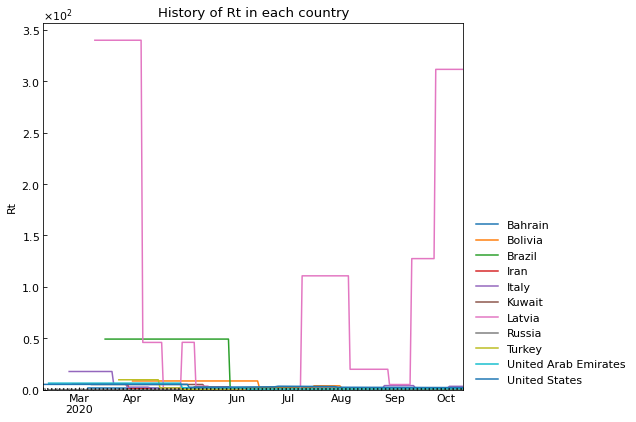

Country,Bahrain,Bolivia,Brazil,Iran,Italy,Kuwait,Latvia,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,
2020-10-07,0.81,0.62,0.96,1.53,3.28,0.91,311.38,1.7,1.33,0.94,2.05
2020-10-08,0.81,0.62,0.96,1.53,3.28,0.91,311.38,1.7,1.33,0.94,2.05
2020-10-09,0.81,0.62,0.96,1.53,3.28,0.91,311.38,1.7,1.33,0.94,2.05
2020-10-10,0.81,0.62,0.96,1.53,3.28,0.91,311.38,1.7,1.33,0.94,2.05
2020-10-11,0.81,0.62,0.96,1.53,3.28,0.91,311.38,1.7,1.33,0.94,2.05


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

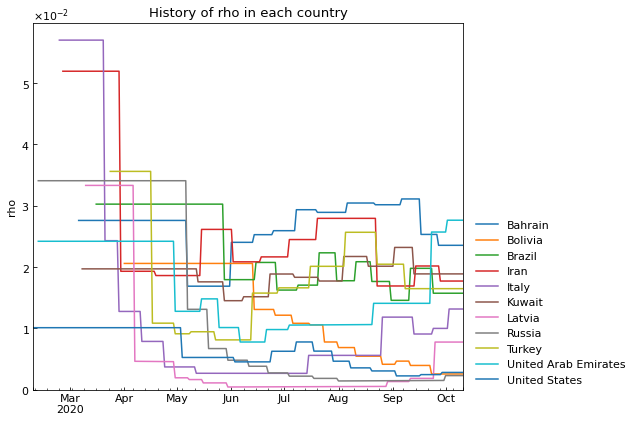

Country,Bahrain,Bolivia,Brazil,Iran,Italy,Kuwait,Latvia,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,
2020-10-07,0.023548,0.002563,0.015734,0.01772,0.013159,0.018885,0.007769,0.002296,0.016479,0.027642,0.002817
2020-10-08,0.023548,0.002563,0.015734,0.01772,0.013159,0.018885,0.007769,0.002296,0.016479,0.027642,0.002817
2020-10-09,0.023548,0.002563,0.015734,0.01772,0.013159,0.018885,0.007769,0.002296,0.016479,0.027642,0.002817
2020-10-10,0.023548,0.002563,0.015734,0.01772,0.013159,0.018885,0.007769,0.002296,0.016479,0.027642,0.002817
2020-10-11,0.023548,0.002563,0.015734,0.01772,0.013159,0.018885,0.007769,0.002296,0.016479,0.027642,0.002817


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

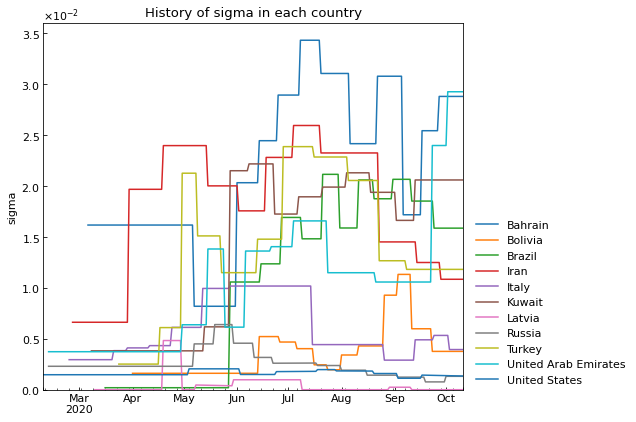

Country,Bahrain,Bolivia,Brazil,Iran,Italy,Kuwait,Latvia,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,
2020-10-07,0.028786,0.00376,0.015857,0.010838,0.003941,0.020585,0.0,0.001314,0.01181,0.029244,0.001343
2020-10-08,0.028786,0.00376,0.015857,0.010838,0.003941,0.020585,0.0,0.001314,0.01181,0.029244,0.001343
2020-10-09,0.028786,0.00376,0.015857,0.010838,0.003941,0.020585,0.0,0.001314,0.01181,0.029244,0.001343
2020-10-10,0.028786,0.00376,0.015857,0.010838,0.003941,0.020585,0.0,0.001314,0.01181,0.029244,0.001343
2020-10-11,0.028786,0.00376,0.015857,0.010838,0.003941,0.020585,0.0,0.001314,0.01181,0.029244,0.001343


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

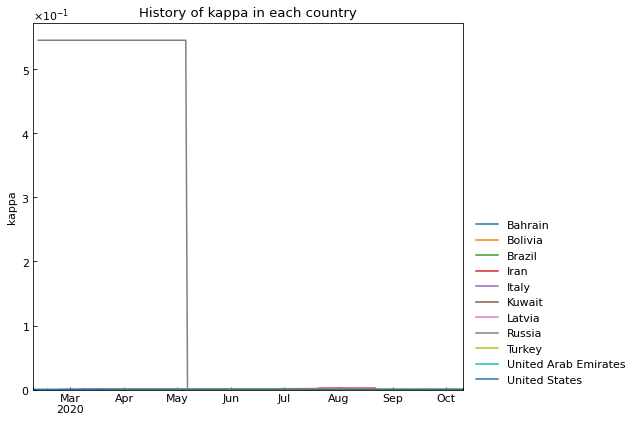

Country,Bahrain,Bolivia,Brazil,Iran,Italy,Kuwait,Latvia,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,
2020-10-07,0.000096,0.000014,0.00045,0.000236,0.000071,0.000072,0.000025,0.000031,0.000516,0.000031,0.000002
2020-10-08,0.000096,0.000014,0.00045,0.000236,0.000071,0.000072,0.000025,0.000031,0.000516,0.000031,0.000002
2020-10-09,0.000096,0.000014,0.00045,0.000236,0.000071,0.000072,0.000025,0.000031,0.000516,0.000031,0.000002
2020-10-10,0.000096,0.000014,0.00045,0.000236,0.000071,0.000072,0.000025,0.000031,0.000516,0.000031,0.000002
2020-10-11,0.000096,0.000014,0.00045,0.000236,0.000071,0.000072,0.000025,0.000031,0.000516,0.000031,0.000002


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

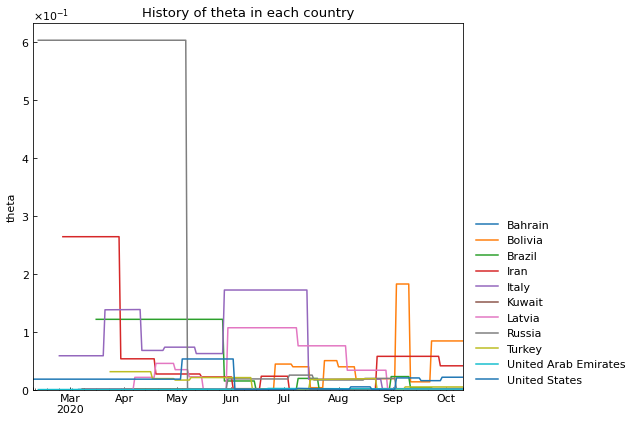

Country,Bahrain,Bolivia,Brazil,Iran,Italy,Kuwait,Latvia,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,
2020-10-07,0.000514,0.084087,0.000234,0.041204,0.000928,0.000629,0.001247,0.002424,0.004787,0.000938,0.02152
2020-10-08,0.000514,0.084087,0.000234,0.041204,0.000928,0.000629,0.001247,0.002424,0.004787,0.000938,0.02152
2020-10-09,0.000514,0.084087,0.000234,0.041204,0.000928,0.000629,0.001247,0.002424,0.004787,0.000938,0.02152
2020-10-10,0.000514,0.084087,0.000234,0.041204,0.000928,0.000629,0.001247,0.002424,0.004787,0.000938,0.02152
2020-10-11,0.000514,0.084087,0.000234,0.041204,0.000928,0.000629,0.001247,0.002424,0.004787,0.000938,0.02152


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67284 entries, 0 to 67423
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 67284 non-null  datetime64[ns]
 1   Country                              67284 non-null  object        
 2   Rt                                   67284 non-null  float64       
 3   theta                                67284 non-null  float64       
 4   kappa                                67284 non-null  float64       
 5   rho                                  67284 non-null  float64       
 6   sigma                                67284 non-null  float64       
 7   School_closing                       67284 non-null  int64         
 8   Workplace_closing                    67284 non-null  int64         
 9   Cancel_events                        67284 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.184346,-0.149745,0.269915,-0.293188,-0.343891,-0.171356,-0.240393,-0.174466,-0.262072,-0.222277,-0.361323,-0.208718,-0.078485,-0.207271,-0.130815,-0.250314
theta,-0.184346,1.000000,0.979854,0.657260,0.059704,-0.145238,-0.116593,-0.143619,-0.065692,-0.106691,0.261627,0.177056,0.169300,-0.341199,-0.226259,0.010364,-0.021736
kappa,-0.149745,0.979854,1.000000,0.698189,0.032755,-0.164324,-0.141087,-0.117486,-0.054269,-0.074933,0.266050,0.213741,0.214793,-0.364477,-0.226614,-0.038013,-0.023438
rho,0.269915,0.657260,0.698189,1.000000,0.121790,-0.161977,-0.177419,-0.052841,-0.001854,-0.034623,0.200367,0.191955,0.160842,-0.418689,-0.438851,-0.249464,-0.018639
sigma,-0.293188,0.059704,0.032755,0.121790,1.000000,0.266963,0.026300,0.286391,0.125109,0.191413,0.179462,0.286630,0.111519,0.013653,-0.021235,0.116823,0.236111
School_closing,-0.343891,-0.145238,-0.164324,-0.161977,0.266963,1.000000,0.699933,0.730653,0.635680,0.520495,0.553363,0.553402,0.455169,0.668767,0.480439,0.267214,0.812643
Workplace_closing,-0.171356,-0.116593,-0.141087,-0.177419,0.026300,0.699933,1.000000,0.605780,0.606639,0.472790,0.580387,0.382931,0.400036,0.814014,0.516242,0.405949,0.798591
Cancel_events,-0.240393,-0.143619,-0.117486,-0.052841,0.286391,0.730653,0.605780,1.000000,0.651896,0.563125,0.497619,0.562690,0.671674,0.630884,0.334621,0.261258,0.811368
Gatherings_restrictions,-0.174466,-0.065692,-0.054269,-0.001854,0.125109,0.635680,0.606639,0.651896,1.000000,0.801551,0.673120,0.684089,0.593324,0.528503,0.259631,0.084011,0.873137
Transport_closing,-0.262072,-0.106691,-0.074933,-0.034623,0.191413,0.520495,0.472790,0.563125,0.801551,1.000000,0.544540,0.624363,0.606824,0.327484,0.048483,-0.159497,0.754446


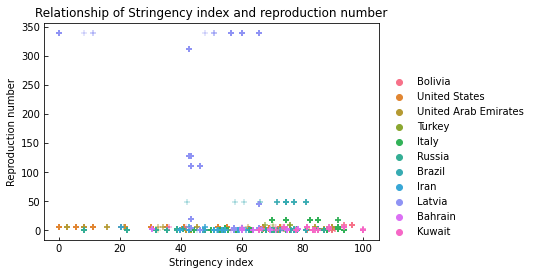

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()